### Creating the SQLite Database and Sales Table

In [1]:
import sqlite3

In [2]:
conn=sqlite3.connect('sales_data.db')
cursor=conn.cursor()

In [3]:
#Create Cursor Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [4]:
# Insert sample data
sample_data = [
    ('Pasta', 10, 200),
    ('Cold Coffee', 20, 100),
    ('Chicken Pizza', 15, 250),
    ('Ice Cream', 5, 80),
    ('Biryani', 10, 50)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

conn.commit()
conn.close()

### SQL Query, Loading the Data into Pandas, amd Analysing the data 

In [7]:
import pandas as pd

#Connect to DB
conn=sqlite3.connect('sales_data.db')

query='''
select 
    product, sum(quantity) as Total_Quantity,
    sum(quantity*price) as Revenue
    from sales
group by product
'''

df=pd.read_sql_query(query, conn)
conn.close()

print('Sales Summary:')
print(df)

Sales Summary:
         product  Total_Quantity  Revenue
0        Biryani              20    503.0
1  Chicken Pizza              30   3759.0
2    Cold Coffee              40   2006.0
3      Ice Cream              10    402.5
4          Pasta             110   2050.0


### Analyzing the Data

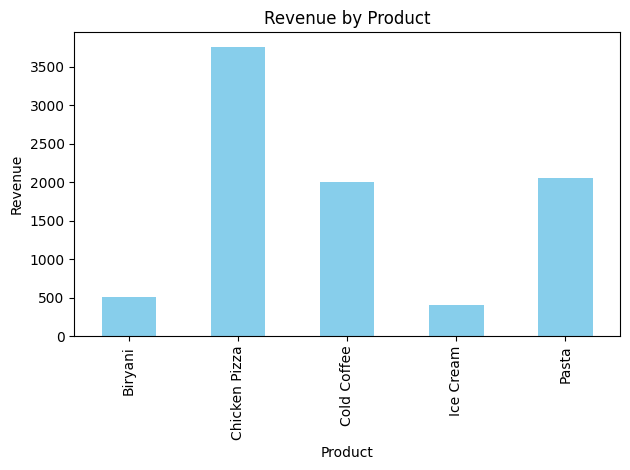

In [9]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='Revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

-- Chicken Pizza generated the most revenue

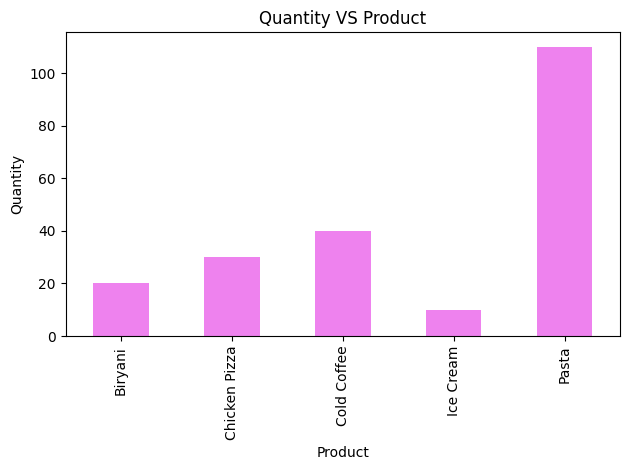

In [14]:
df.plot(kind='bar', x='product', y='Total_Quantity', legend=False, color='violet')
plt.title('Quantity VS Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

-- 